In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#VISUALISING AND UNDERSTANDING THE DATASET

In [3]:
dftrain=pd.read_csv('/kaggle/input/titanic/train.csv')
dfeval=pd.read_csv('/kaggle/input/titanic/test.csv')

dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#observing the data set
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#missing data values
total=dftrain.isnull().sum().sort_values(ascending=False)
null_percentage=round(total*100/dftrain.isnull().count(),2)
missing_data=pd.concat([total,null_percentage],axis=1,keys=['Missing Data','Missing (%)'])
print(missing_data)

             Missing Data  Missing (%)
Cabin                 687        77.10
Age                   177        19.87
Embarked                2         0.22
PassengerId             0         0.00
Survived                0         0.00
Pclass                  0         0.00
Name                    0         0.00
Sex                     0         0.00
SibSp                   0         0.00
Parch                   0         0.00
Ticket                  0         0.00
Fare                    0         0.00


In [7]:
dftrain.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

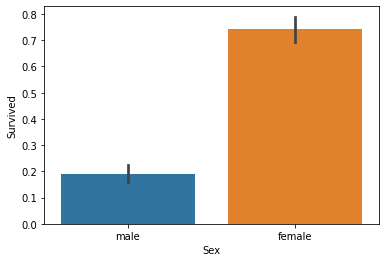

In [8]:
#survival distribution among sex
sns.barplot(x='Sex',y='Survived', data=dftrain)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

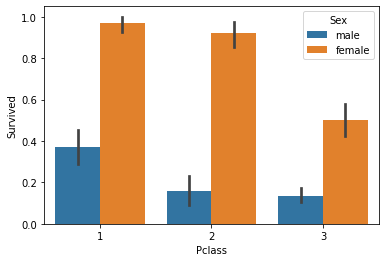

In [9]:
#survival distribution based on passenger class
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=dftrain)

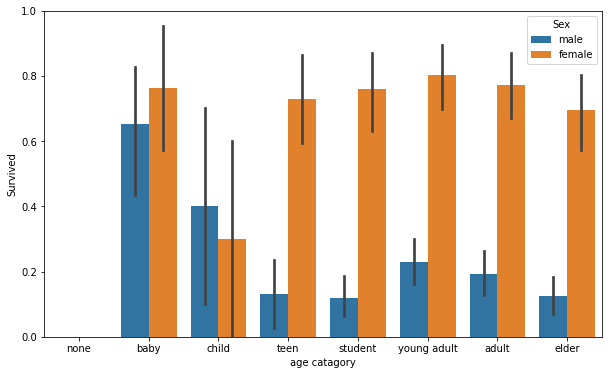

In [10]:
#survival distribution based ages ranges
def get_age_catagory(age):
    catagory=''
    if age<=-1: 
        catagory='none'
    elif age<=5:
        catagory='baby'
    elif age<=10:
        catagory='child'
    elif age<=18:
        catagory='teen'
    elif age<=25:
        catagory='student'
    elif age<=35:
        catagory='young adult'
    elif age<=60:
        catagory='adult'
    else:
        catagory='elder'
    return catagory

plt.figure(figsize=(10,6))
groups=['none','baby','child','teen','student','young adult','adult','elder']
dftrain['age catagory']=dftrain['Age'].apply(lambda x:get_age_catagory(x))
sns.barplot(x='age catagory', y='Survived', hue='Sex', data=dftrain, order=groups)
dftrain.drop('age catagory', axis=1, inplace=True)

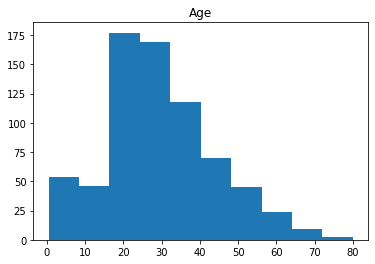

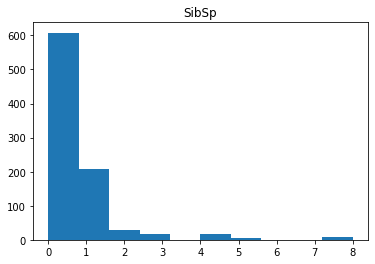

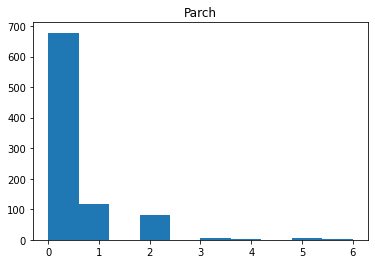

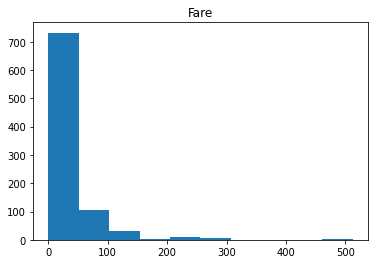

In [11]:
#passenger distribution among different catagories
df_num=dftrain[['Age','SibSp','Parch','Fare']]
df_cat = dftrain[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

for i in df_num.columns:
    plt.hist(dftrain[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

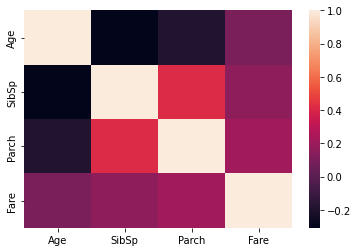

In [12]:
#co-relation betweem different features.
sns.heatmap(df_num.corr())

In [13]:
#co-relation between survival rate and Age, No of Siblings, Parch and Fare
pd.pivot_table(dftrain,index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [14]:
#co-relation between survival and passenger classes
pd.pivot_table(dftrain, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [15]:
#co-relation between survival and sex
pd.pivot_table(dftrain, index='Survived', columns='Sex', values='Ticket', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [16]:
#FEATURE ENGINEERING

In [17]:
#checking whethe people had multiple cabins
df_cat.Cabin
dftrain['no_of_cabins']=dftrain.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
dftrain['no_of_cabins'].value_counts()

dfeval['no_of_cabins']=dftrain.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
dfeval['no_of_cabins'].value_counts()

0    326
1     80
2      8
3      3
4      1
Name: no_of_cabins, dtype: int64

In [18]:
pd.pivot_table(dftrain, index='Survived',columns=['no_of_cabins'],values='Name',aggfunc='count')

no_of_cabins,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [19]:
train_df=dftrain.drop(['PassengerId'], axis=1)
test_df=dfeval.drop(['PassengerId'],axis=1)



In [20]:
import re
deck = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'U':8}
data=[train_df,test_df]

for dataset in data:
    dataset['Cabin']=dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck']=dataset['Deck'].map(deck)
    dataset['Deck']=dataset['Deck'].fillna(0)
    dataset['Deck']=dataset['Deck'].astype(int)

train_df=train_df.drop(['Cabin'],axis=1)
test_df=dfeval.drop(['Cabin'],axis=1)

In [21]:
data=[train_df,test_df]

for dataset in data:
    mean=dataset['Age'].mean()
    std=dataset['Age'].std()
    is_null=dataset['Age'].isnull().sum()
    
    age_val=np.random.randint(mean-std,mean+std,is_null)
    
    age_lst=dataset['Age'].copy()
    age_lst[np.isnan(age_lst)]=age_val
    
    dataset['Age']=age_lst
    dataset["Age"]=train_df["Age"].astype(int)

In [22]:
data=[train_df,test_df]

for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [23]:
data=[train_df,test_df]

for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)

In [24]:
data=[train_df,test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title']=dataset['Title'].map(titles)
    dataset['Title']=dataset['Title'].fillna(0)
    
train_df=train_df.drop(['Name'],axis=1)
test_df=test_df.drop(['Name'],axis=1)

## 

In [25]:
gender={"male":0, "female":1}

data=[train_df,test_df]

for dataset in data:
    dataset["Sex"]=dataset["Sex"].map(gender)

In [26]:
train_df=train_df.drop(['Ticket'],axis=1)
test_df=test_df.drop(['Ticket'],axis=1)

In [27]:
ports={"S":0,"C":1,"Q":2}
data=[train_df,test_df]

for dataset in data:
    dataset["Embarked"]=dataset["Embarked"].map(ports)

In [28]:
data=[train_df,test_df]

for dataset in data:
    dataset['Age']=dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=11,'Age']=0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    


In [29]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [30]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_of_cabins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [31]:
data = [train_df, test_df]

for dataset in data:
    dataset["age_type"]=dataset["Age"]*dataset["Pclass"]
    dataset["Fair_per_person"]=dataset["Fare"]/(dataset["SibSp"]+1)
    dataset["Fair_per_person"].astype(int)

In [32]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,no_of_cabins,Deck,Title,age_type,Fair_per_person
0,0,3,0,2,1,0,0,0,0,8,1,6,0.0
1,1,1,1,5,1,0,3,1,1,3,3,5,1.5
2,1,3,1,3,0,0,0,0,0,8,2,9,0.0
3,1,1,1,5,1,0,3,0,1,3,3,5,1.5
4,0,3,0,5,0,0,1,0,0,8,1,15,1.0
5,0,3,0,6,0,0,1,2,0,8,1,18,1.0
6,0,1,0,6,0,0,3,0,1,5,1,6,3.0
7,0,3,0,0,3,1,2,0,0,8,4,0,0.5
8,1,3,1,3,0,2,1,0,0,8,3,9,1.0
9,1,2,1,1,1,0,2,1,0,8,3,2,1.0


In [33]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,no_of_cabins,Title,age_type,Fair_per_person
0,892,3,0,2,0,0,0,2,0,1,6,0.0
1,893,3,1,5,1,0,0,0,1,3,15,0.0
2,894,2,0,3,0,0,1,2,0,1,6,1.0
3,895,3,0,5,0,0,1,0,1,1,15,1.0
4,896,3,1,5,1,1,1,0,0,3,15,0.5


In [34]:
x_train1=train_df.drop("Survived",axis=1)
x_train=x_train1.drop("Deck",axis=1)
y_train=train_df["Survived"]
x_test=test_df.drop("PassengerId", axis=1)

In [35]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,no_of_cabins,Title,age_type,Fair_per_person
0,3,0,2,1,0,0,0,0,1,6,0.0
1,1,1,5,1,0,3,1,1,3,5,1.5
2,3,1,3,0,0,0,0,0,2,9,0.0
3,1,1,5,1,0,3,0,1,3,5,1.5
4,3,0,5,0,0,1,0,0,1,15,1.0


In [36]:
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [37]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,no_of_cabins,Title,age_type,Fair_per_person
0,3,0,2,1,0,0,0,0,1,6,0.0
1,1,1,5,1,0,3,1,1,3,5,1.5
2,3,1,3,0,0,0,0,0,2,9,0.0
3,1,1,5,1,0,3,0,1,3,5,1.5
4,3,0,5,0,0,1,0,0,1,15,1.0


In [38]:
sgd=linear_model.SGDClassifier(max_iter=5,tol=None)
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)

round(sgd.score(x_train,y_train)*100,2)

77.89

In [39]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)

y_predict=random_forest.predict(x_test)

round(random_forest.score(x_train,y_train)*100,2)



92.03